In [1]:
import fc
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

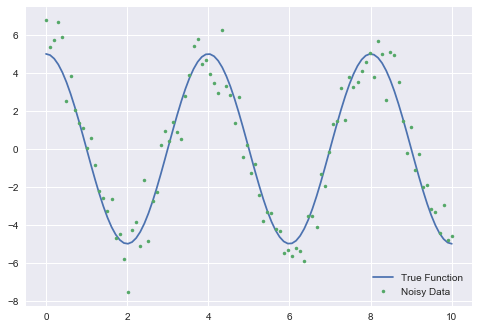

In [2]:
np.random.seed(0)
def model(t, A, w):
    return A * np.cos(w * t)

t = np.linspace(0, 10, 100)
true_params = (5.0, np.pi/2)
pure = model(t, *true_params)
data = pure + np.random.normal(0, 1, t.size)

#Plot
plt.plot(t, pure, label='True Function')
plt.plot(t, data, '.', label='Noisy Data')
plt.legend()

In [3]:
p = [[4.5, 5.7], [1.52, 1.6]]
ext = (*p[1], *p[0])
res = fc.fit(model, t, data, *p, grid_size=20)
# res_legacy = fc.fit_legacy(model, t, data, *p, grid_size=20)

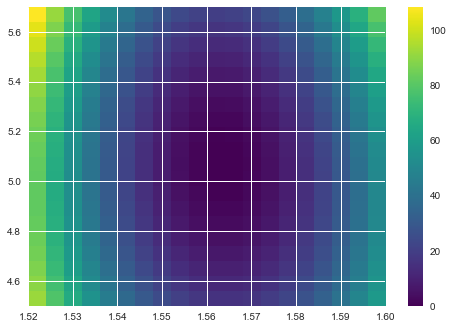

In [4]:
cf = plt.imshow(res.dchi2_space, cmap='viridis', extent=ext, aspect='auto', origin='lower')
plt.colorbar(cf)

# plt.figure()
# cf2 = plt.imshow(res_legacy.dchi2_space, cmap='viridis', extent=ext, aspect='auto', origin='lower')
# plt.colorbar(cf2)

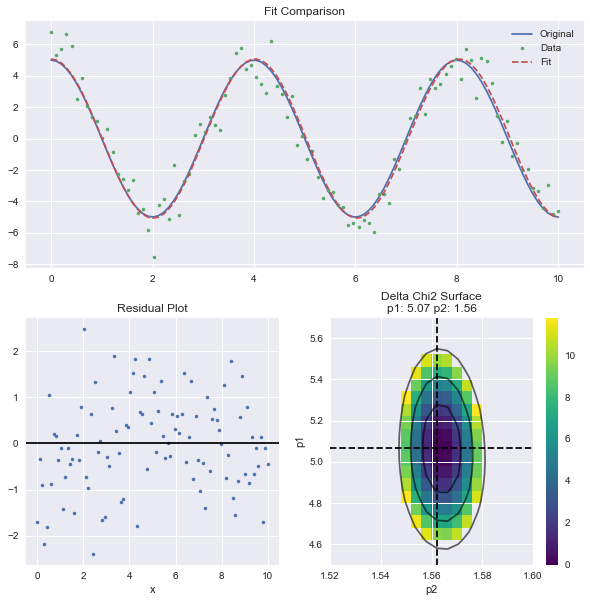

In [5]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.title('Fit Comparison')
plt.plot(t, pure, label='Original')
plt.plot(t, data, '.', label='Data')
plt.plot(t, res.best_fit, '--', label='Fit')
plt.legend()

plt.subplot(2,2,3)
plt.title('Residual Plot')
plt.xlabel('x')
plt.plot(t, res.residuals, '.')
plt.axhline(0, color='k')

plt.subplot(2,2,4)
plt.title('Delta Chi2 Surface\np1: {:.2f} p2: {:.2f}'.format(*res.params))
plt.ylabel('p1')
plt.xlabel('p2')
cf = plt.imshow(np.ma.masked_greater(res.dchi2_space, 11.83), cmap='viridis', extent=ext, aspect='auto', origin='lower')
plt.contour(res.dchi2_space, [0, 2.3, 6.18, 11.83], colors='k', alpha=0.6, extent=ext)
plt.axhline(res.params[0], c='k', ls='--')
plt.axvline(res.params[1], c='k', ls='--')
plt.colorbar(cf)

In [6]:
dchi2 = res.fc(n_exp=100)

100% (100 of 100) |#######################| Elapsed Time: 0:00:14 Time: 0:00:14
INFO:root:Time elapsed for 100 experiments: 14.5853s


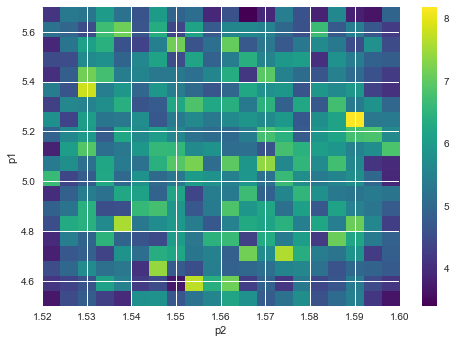

In [7]:
surf = np.percentile(dchi2, 95, axis=0)
plt.imshow(surf, cmap='viridis', extent=ext, aspect='auto')
plt.ylabel('p1')
plt.xlabel('p2')
plt.colorbar()

(array([ 32.,  25.,  17.,   5.,   8.,   1.,   4.,   4.,   2.,   2.]),
 array([ 0.0652533 ,  0.94099779,  1.81674227,  2.69248676,  3.56823124,
         4.44397573,  5.31972021,  6.1954647 ,  7.07120918,  7.94695367,
         8.82269816]),
 <a list of 10 Patch objects>)

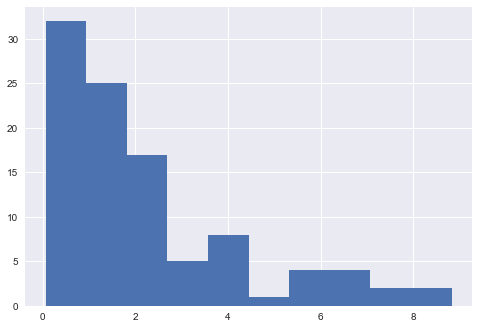

In [8]:
plt.hist(dchi2[:, 10, 10])

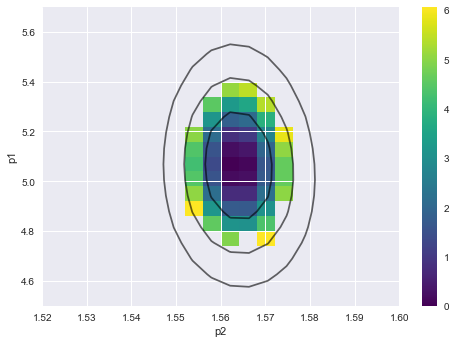

In [9]:
cf = plt.imshow(res.get_surface(95), cmap='viridis', extent=ext, aspect='auto', origin='lower')
plt.contour(res.dchi2_space, [0, 2.3, 6.18, 11.83], colors='k', alpha=0.6, extent=ext)
plt.ylabel('p1')
plt.xlabel('p2')
plt.colorbar(cf)

In [10]:
res.params

[5.0684210526315789, 1.5621052631578949]

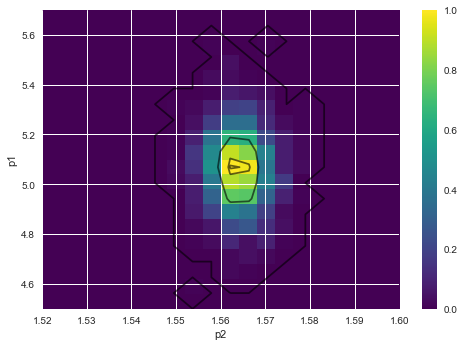

In [11]:
conf = res.get_probability_surface()

cf = plt.imshow(conf, cmap='viridis', extent=ext, aspect='auto', origin='lower')
plt.contour(conf, [0, .68, .95, .99], colors='k', alpha=0.6, extent=ext)
plt.ylabel('p1')
plt.xlabel('p2')
plt.colorbar(cf)

In [12]:
n = np.empty((20, 20, 1))
model(t, 2, 3, 1, *n[1, 2])

TypeError: model() takes 3 positional arguments but 5 were given